In [529]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [530]:
df = pd.read_csv('fall.csv', usecols = ['yAcc','zAcc','yGyro','zGyro','label'])

In [531]:
df.head()

,yAcc,zAcc,yGyro,zGyro,label
0,-0.57,-7.28,-3.23,2.62,fall
1,-0.75,-6.93,-6.35,4.64,fall
2,-0.63,-6.73,-5.49,3.85,fall
3,-0.62,-6.80,-2.26,0.67,fall
4,-0.39,-6.60,-0.24,-1.10,fall


In [532]:
df['label'].value_counts()

label
light    27600
walk     19200
fall     18401
sit      16000
step      6000
rfall     5599
lfall     4000
Name: count, dtype: int64

In [533]:
df.shape

(96800, 5)

In [534]:
# fall, lfall, rfall, light
# walk, sit, step
label = ['walk','sit','step']
df = df[~df['label'].isin(label)]
df['label'].value_counts()

label
light    27600
fall     18401
rfall     5599
lfall     4000
Name: count, dtype: int64

In [535]:
df.reset_index(drop=True, inplace=True)

In [536]:
df.head()

,yAcc,zAcc,yGyro,zGyro,label
0,-0.57,-7.28,-3.23,2.62,fall
1,-0.75,-6.93,-6.35,4.64,fall
2,-0.63,-6.73,-5.49,3.85,fall
3,-0.62,-6.80,-2.26,0.67,fall
4,-0.39,-6.60,-0.24,-1.10,fall


In [537]:
df.shape

(55600, 5)

In [538]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab

# 'yAcc', 'zAcc', 'yGyro', 'zGyro'

def plot_data(df, feature):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    axes[0].hist(df[feature], color='blue', alpha=0.7, bins=30)
    axes[0].set_title(f"Histogram of {feature}")
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel("Frequency")

    stats.probplot(df[feature], dist='norm', plot=axes[1])
    axes[1].set_title(f"QQ Plot of {feature}")

    plt.tight_layout()
    plt.show()

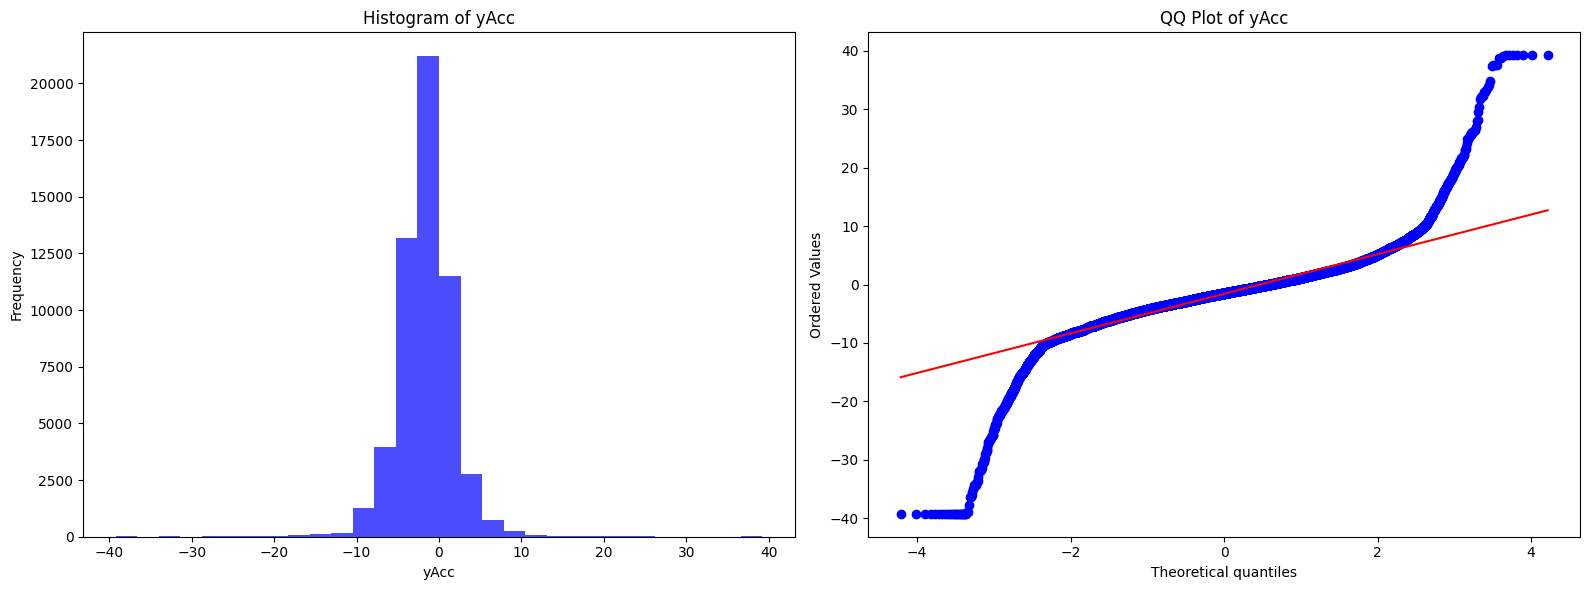

In [539]:
plot_data(df, 'yAcc')

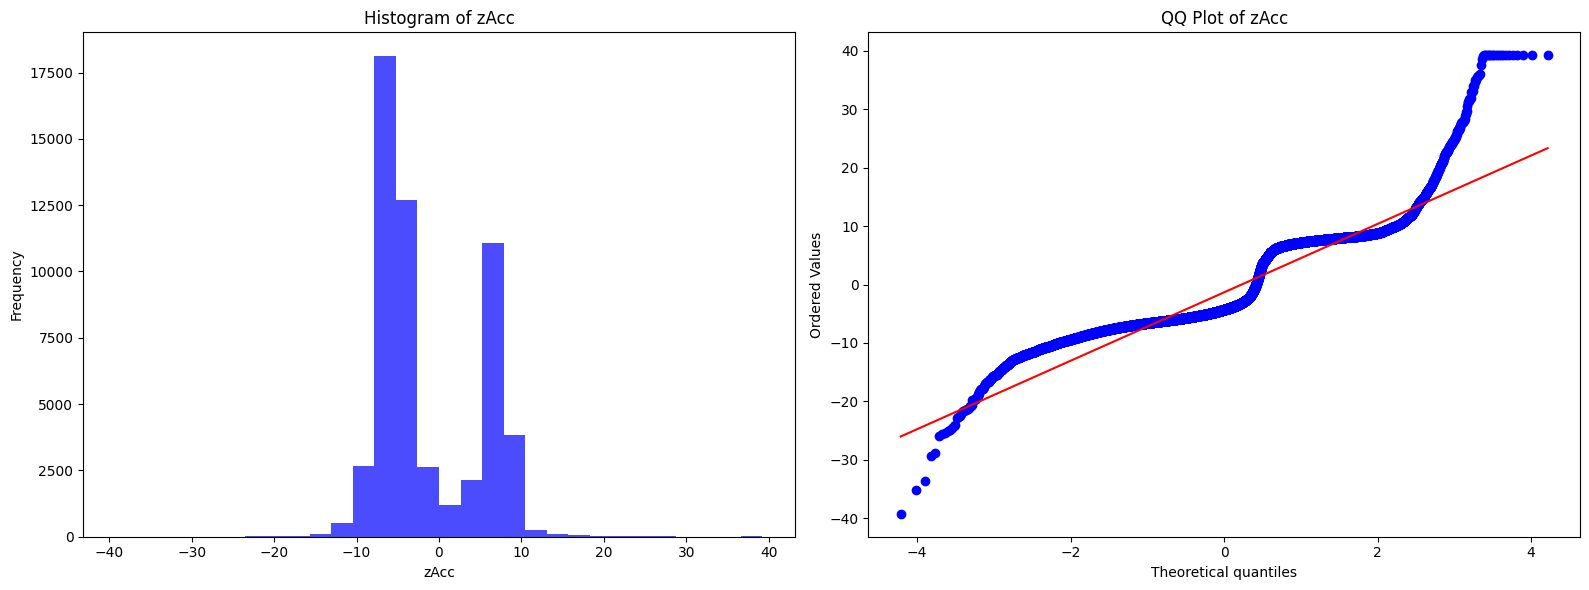

In [540]:
plot_data(df, 'zAcc')

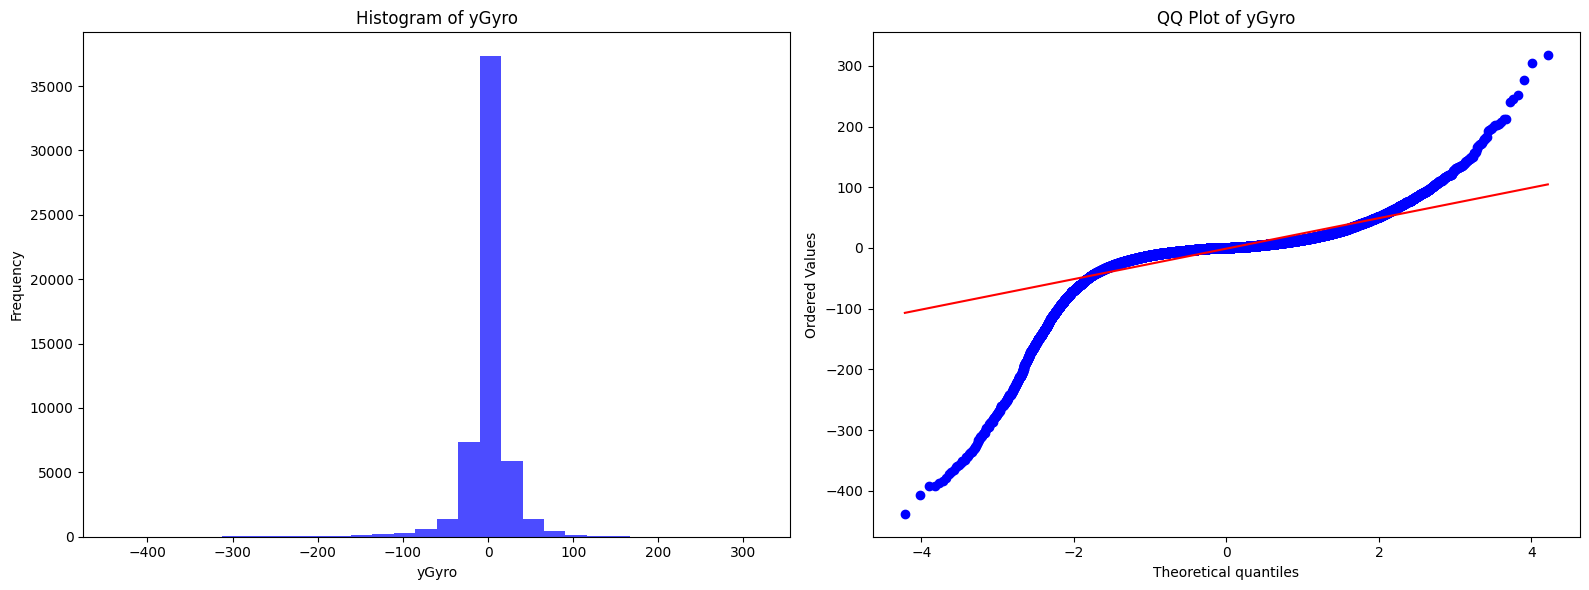

In [541]:
plot_data(df, 'yGyro')

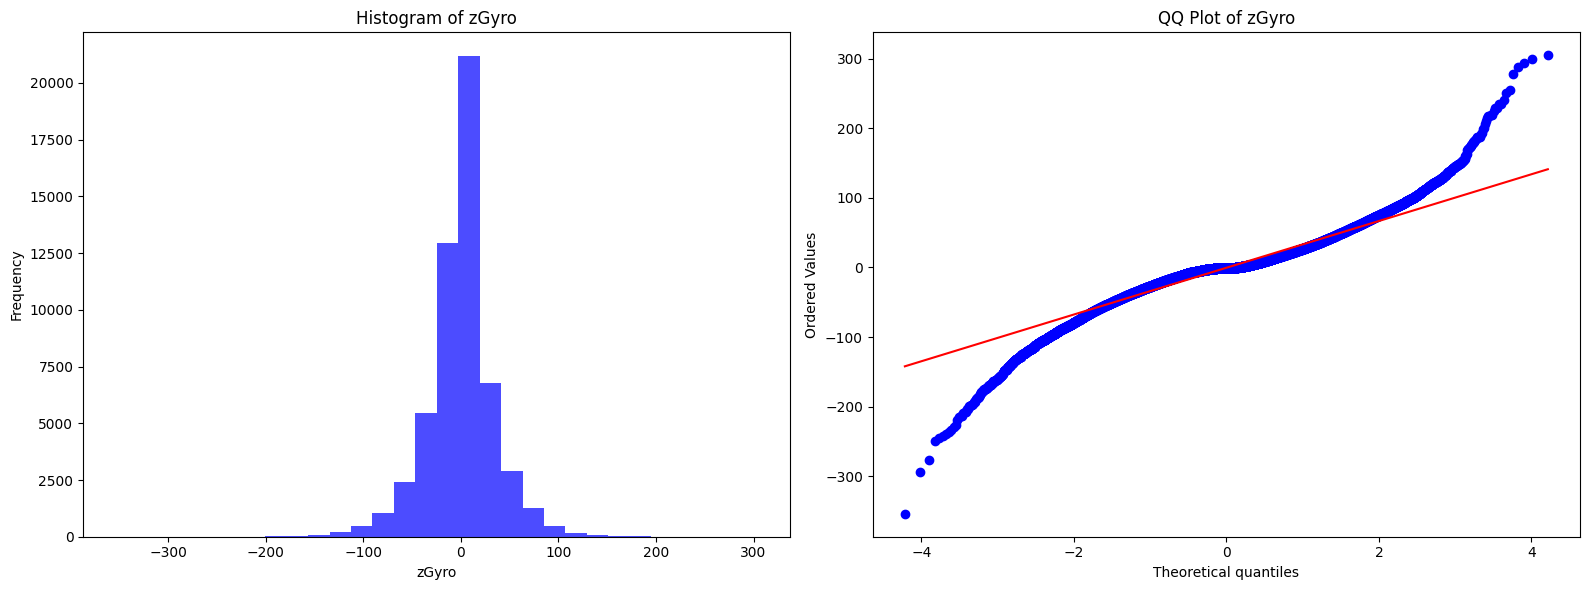

In [542]:
plot_data(df, 'zGyro')

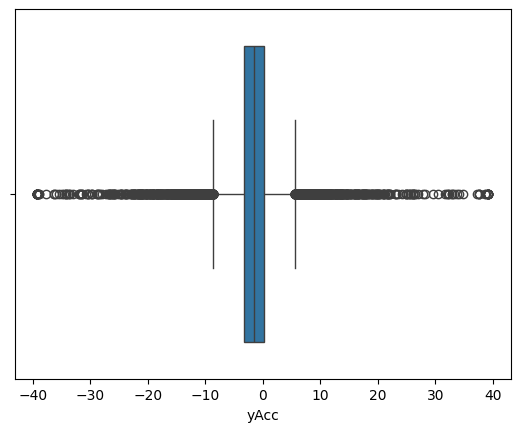

In [543]:
sns.boxplot(data = df, x = 'yAcc')
plt.show()

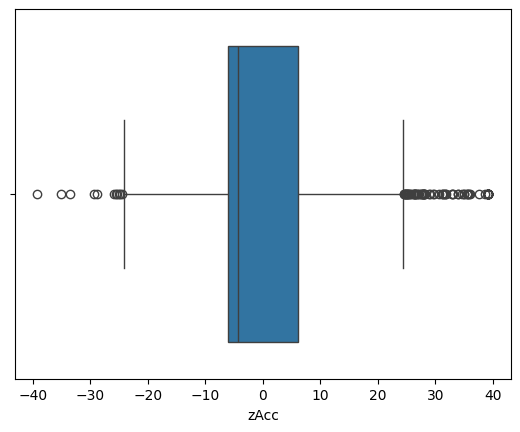

In [544]:
sns.boxplot(data = df, x = 'zAcc')
plt.show()

In [545]:
IQR = df['yAcc'].quantile(0.75) - df['yAcc'].quantile(0.25)
IQR

np.float64(3.56)

In [546]:
df['yAcc'].describe()

count    55600.000000
mean        -1.576253
std          3.623670
min        -39.240000
25%         -3.330000
50%         -1.490000
75%          0.230000
max         39.240000
Name: yAcc, dtype: float64

In [547]:
lower_limit = df['yAcc'].quantile(0.25) - 1.5*IQR
upper_limit = df['yAcc'].quantile(0.75) + 1.5*IQR
print(lower_limit), print(upper_limit)

-8.67
5.57


(None, None)

In [548]:
# lower_limit = df['yAcc'].quantile(0.25) - 1.5*IQR
# upper_limit = df['yAcc'].quantile(0.75) + 1.5*IQR
# print(lower_limit), print(upper_limit)

In [549]:
data = df.copy()

In [550]:
data.loc[data['yAcc'] > 5.57, 'yAcc'] = 5.57
data.loc[data['yAcc'] < -8.67, 'yAcc'] = -8.67

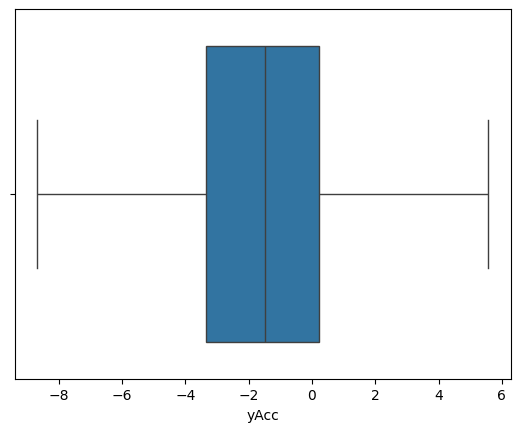

In [551]:
sns.boxplot(data = data, x = 'yAcc')
plt.show()

In [552]:
data['yAcc'].describe()

count    55600.000000
mean        -1.565551
std          2.923705
min         -8.670000
25%         -3.330000
50%         -1.490000
75%          0.230000
max          5.570000
Name: yAcc, dtype: float64

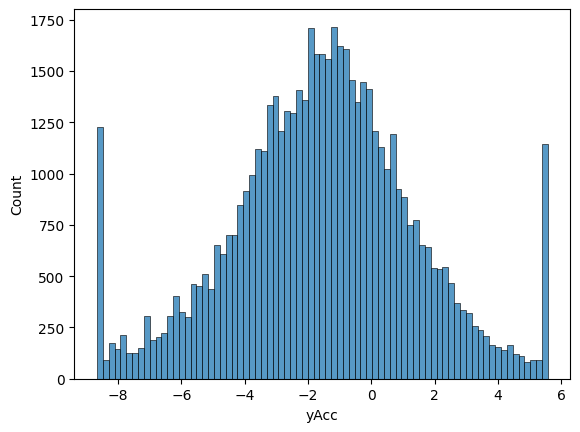

In [553]:
sns.histplot(data = data, x = 'yAcc')
plt.show()

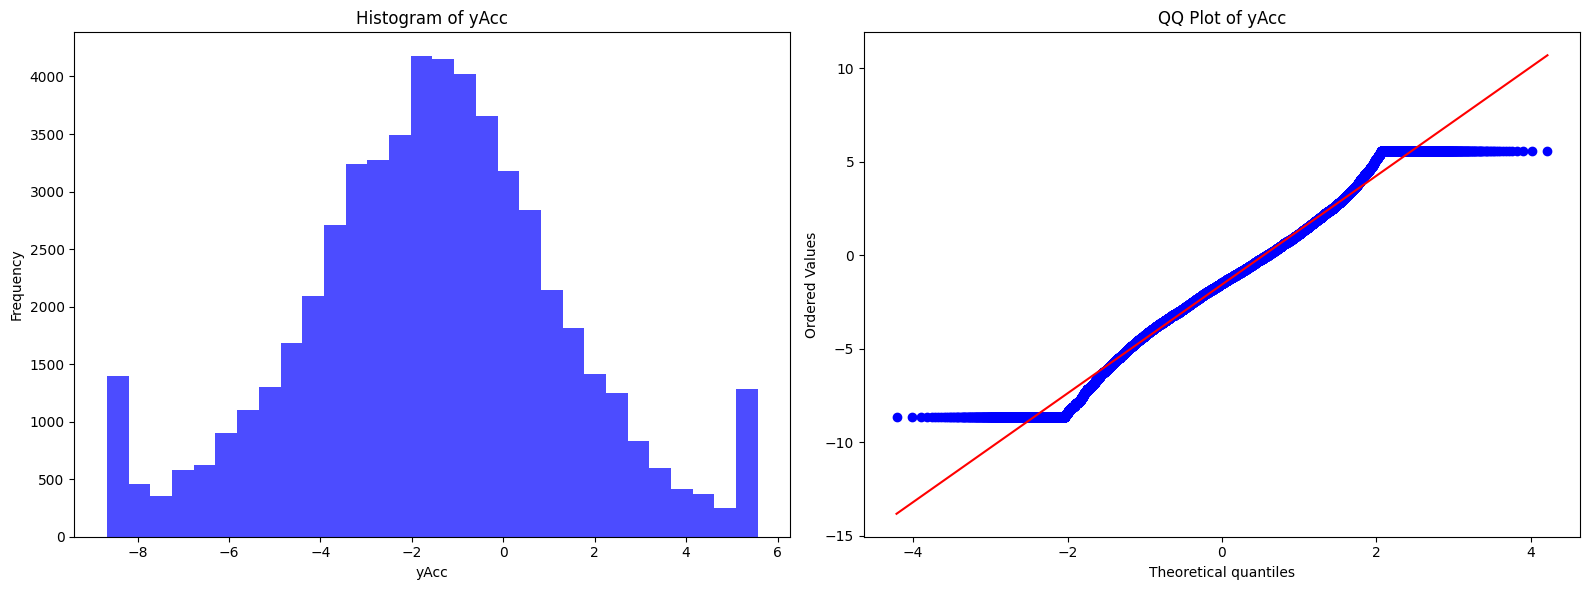

In [554]:
plot_data(data, 'yAcc')

In [555]:
# upper_boundary = data['yAcc'].mean() + (3 * data['yAcc'].std())
# lower_boundary = data['yAcc'].mean() - (3 * data['yAcc'].std())
# print(upper_boundary), print(lower_boundary)

In [556]:
# data.loc[data['yAcc'] > 8.05, 'yAcc'] = 8.05
# data.loc[data['yAcc'] < -11.18, 'yAcc'] = -11.18

In [557]:
data['yAcc'].describe()

count    55600.000000
mean        -1.565551
std          2.923705
min         -8.670000
25%         -3.330000
50%         -1.490000
75%          0.230000
max          5.570000
Name: yAcc, dtype: float64

In [558]:
# sns.boxplot(data = data, x = 'yAcc')
# plt.show()

In [559]:
# upper_boundary = data['yAcc'].mean() + (3 * data['yAcc'].std())
# lower_boundary = data['yAcc'].mean() - (3 * data['yAcc'].std())
# print(upper_boundary), print(lower_boundary)

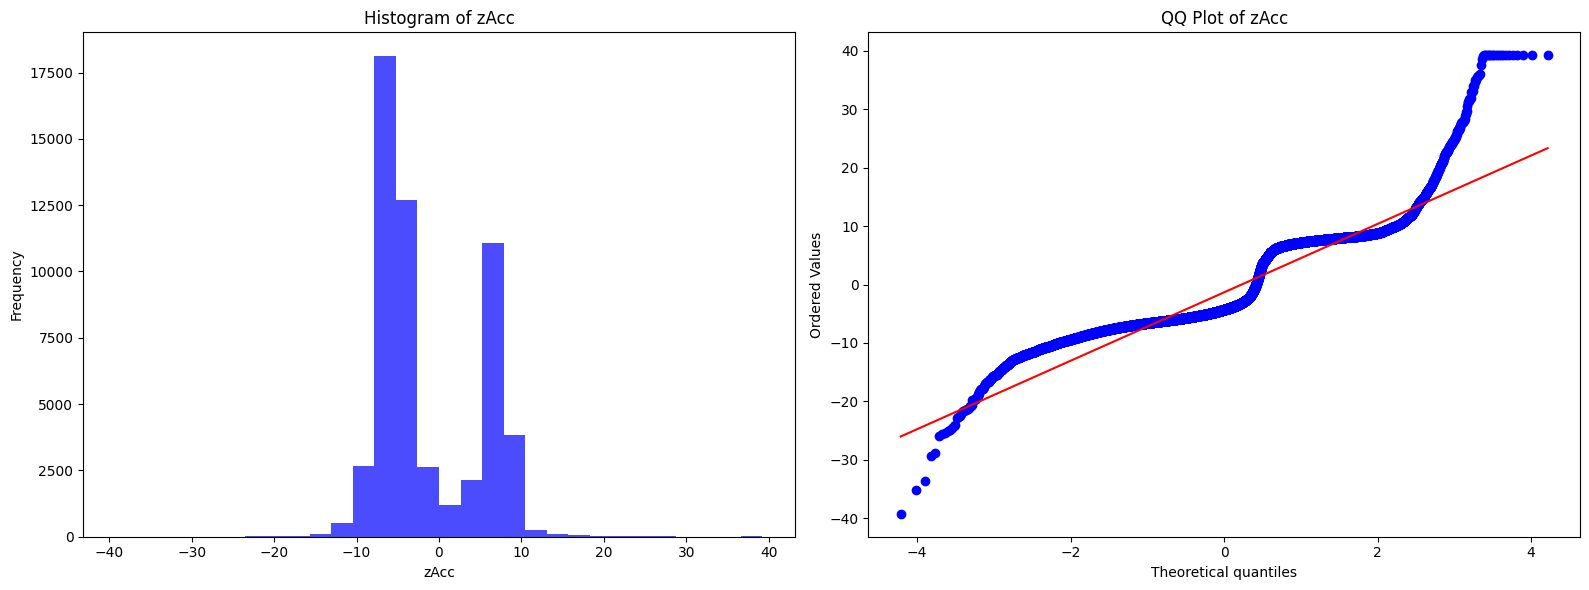

In [560]:
plot_data(data, 'zAcc')

In [561]:
data['zAcc'].describe()

count    55600.000000
mean        -1.333817
std          6.328606
min        -39.240000
25%         -6.050000
50%         -4.300000
75%          6.150000
max         39.240000
Name: zAcc, dtype: float64

In [562]:
IQR = data['zAcc'].quantile(0.75) - data['zAcc'].quantile(0.25)
IQR

np.float64(12.2)

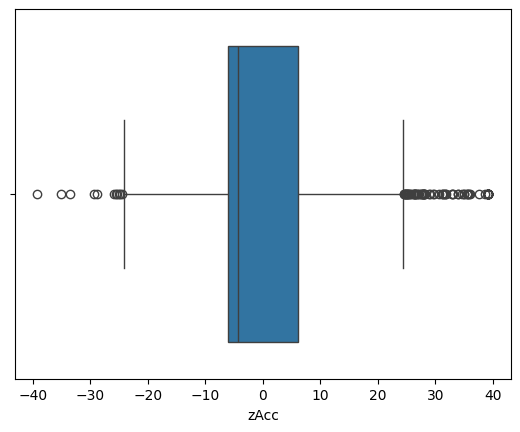

-24.349999999999998
24.449999999999996


(None, None)

In [563]:
sns.boxplot(data = data, x = 'zAcc')
plt.show()

lower_limit = data['zAcc'].quantile(0.25) - 1.5*IQR
upper_limit = data['zAcc'].quantile(0.75) + 1.5*IQR
print(lower_limit), print(upper_limit)


In [564]:
data.loc[data['zAcc'] > 24.44, 'zAcc'] = 24.44
data.loc[data['zAcc'] < -24.34, 'zAcc'] = -24.34


In [565]:
data['zAcc'].describe()

count    55600.000000
mean        -1.343770
std          6.270343
min        -24.340000
25%         -6.050000
50%         -4.300000
75%          6.150000
max         24.440000
Name: zAcc, dtype: float64

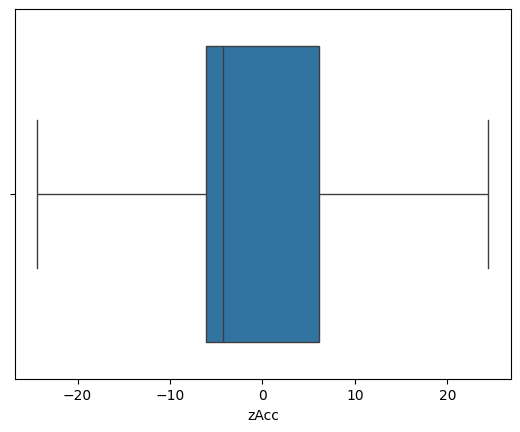

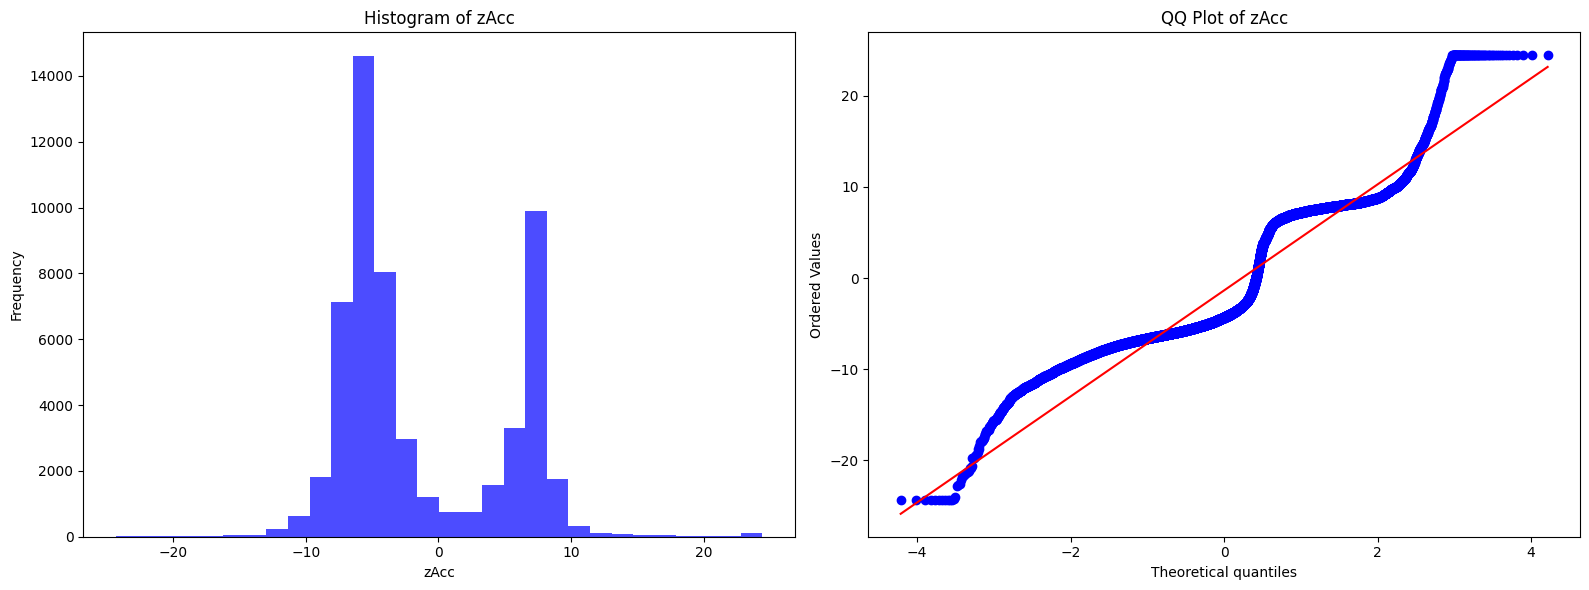

In [566]:
sns.boxplot(data = data, x = 'zAcc')
plt.show()

plot_data(data, 'zAcc')

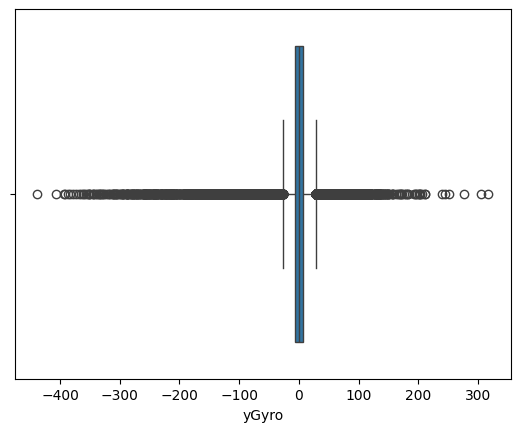

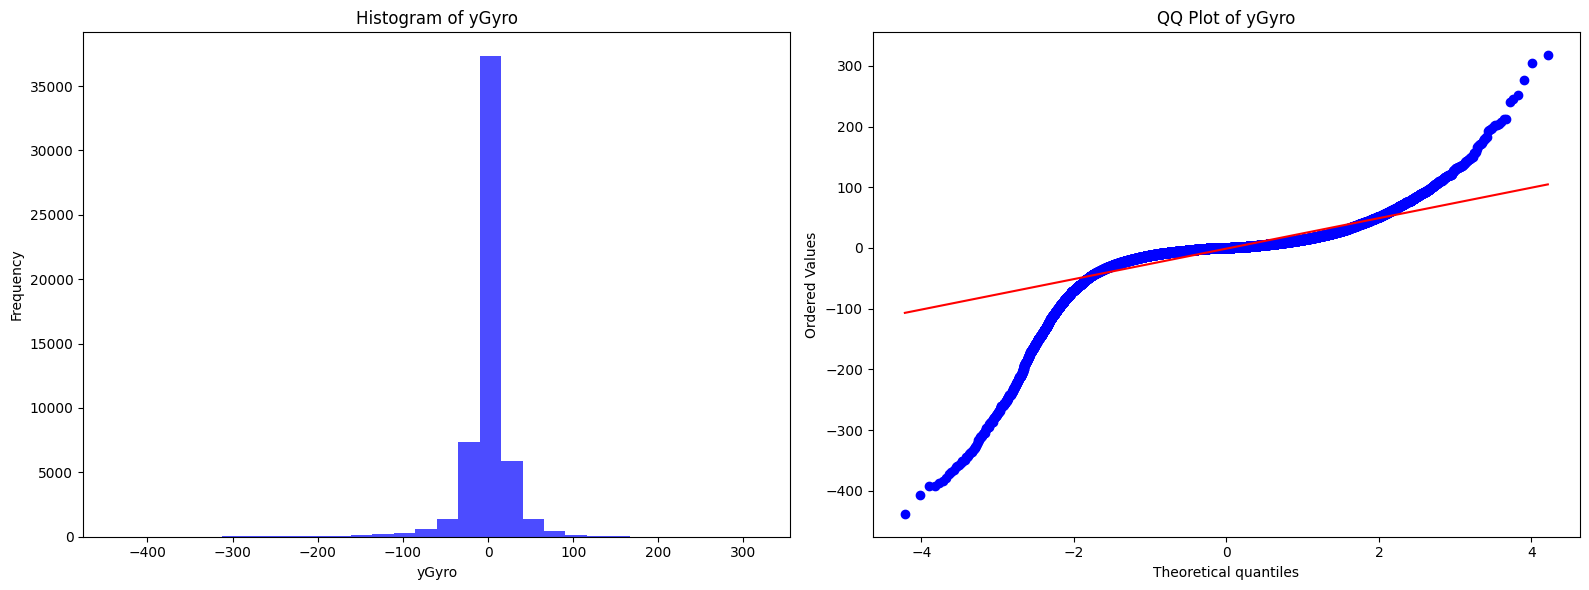

In [567]:
sns.boxplot(data = data, x = 'yGyro')
plt.show()

plot_data(data, 'yGyro')

In [568]:
IQR = data['yGyro'].quantile(0.75) - data['yGyro'].quantile(0.25)
print('IQR is: ',IQR)

lower_limit = data['yGyro'].quantile(0.25) - 1.5*IQR
upper_limit = data['yGyro'].quantile(0.75) + 1.5*IQR
print(lower_limit), print(upper_limit)

data['yGyro'].describe()

IQR is:  13.920000000000002
-27.110000000000003
28.570000000000004


count    55600.000000
mean        -1.098337
std         30.576539
min       -437.810000
25%         -6.230000
50%          0.430000
75%          7.690000
max        317.380000
Name: yGyro, dtype: float64

In [569]:
data.loc[data['yGyro'] > 28.57, 'yGyro'] = 28.57
data.loc[data['yGyro'] < -27.11, 'yGyro'] = -27.11

data['yGyro'].describe()

count    55600.000000
mean         0.600405
std         14.062921
min        -27.110000
25%         -6.230000
50%          0.430000
75%          7.690000
max         28.570000
Name: yGyro, dtype: float64

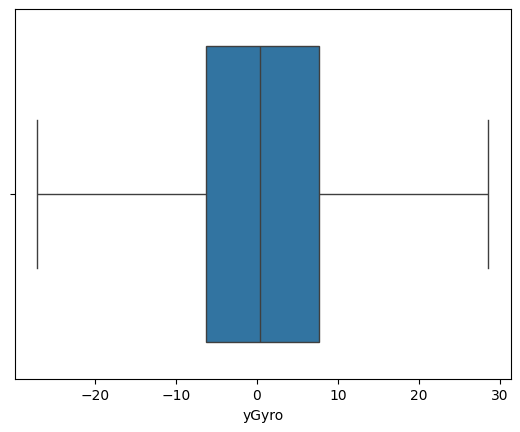

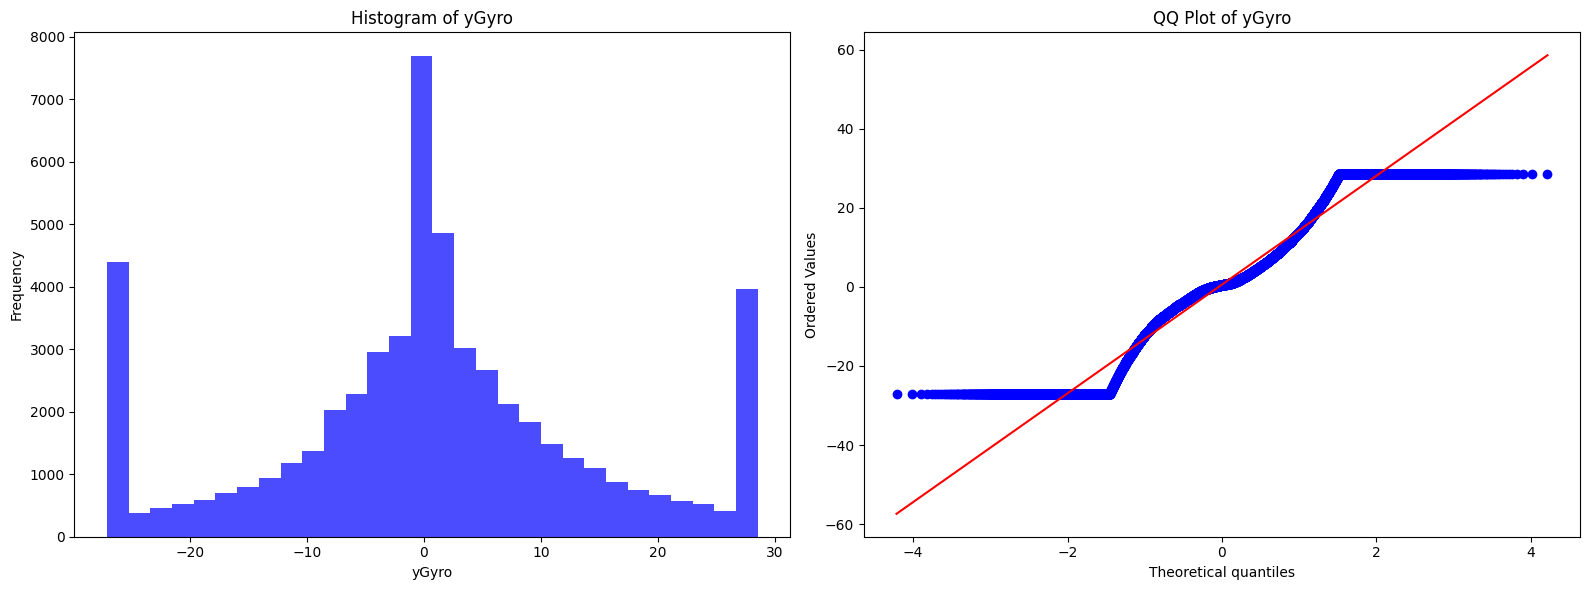

In [570]:
sns.boxplot(data = data, x = 'yGyro')
plt.show()

plot_data(data, 'yGyro')

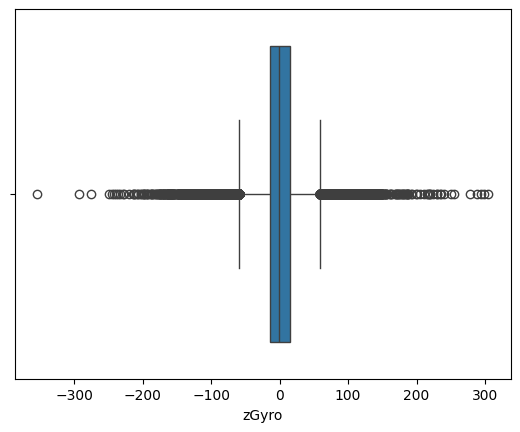

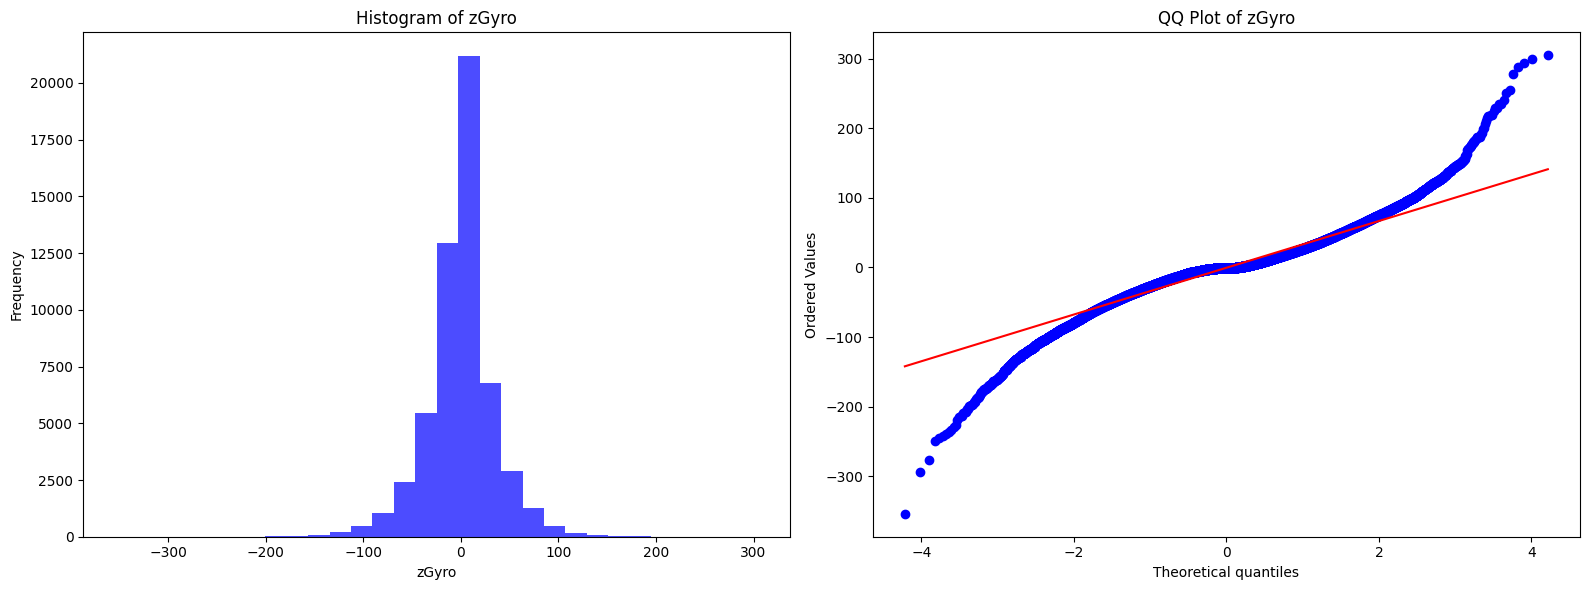

In [571]:
sns.boxplot(data = data, x = 'zGyro')
plt.show()

plot_data(data, 'zGyro')

In [572]:
IQR = data['zGyro'].quantile(0.75) - data['zGyro'].quantile(0.25)
print('IQR is: ',IQR)

lower_limit = data['zGyro'].quantile(0.25) - 1.5*IQR
upper_limit = data['zGyro'].quantile(0.75) + 1.5*IQR
print(lower_limit), print(upper_limit)

data['zGyro'].describe()

IQR is:  29.42
-58.72
58.96


count    55600.000000
mean        -0.492998
std         34.682328
min       -354.000000
25%        -14.590000
50%         -0.920000
75%         14.830000
max        304.870000
Name: zGyro, dtype: float64

In [573]:
data.loc[data['zGyro'] > 58.96, 'zGyro'] = 58.96
data.loc[data['zGyro'] < -58.72, 'zGyro'] = -58.72

data['zGyro'].describe()

count    55600.000000
mean        -0.264122
std         28.212916
min        -58.720000
25%        -14.590000
50%         -0.920000
75%         14.830000
max         58.960000
Name: zGyro, dtype: float64

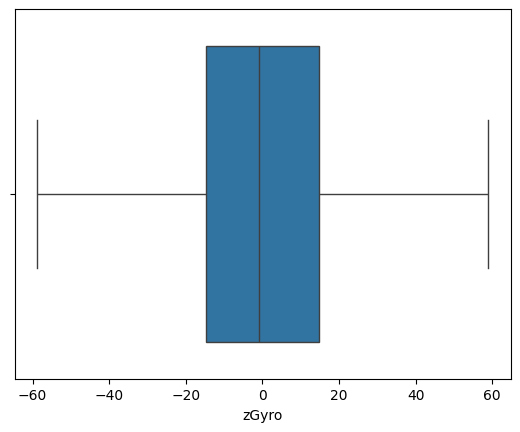

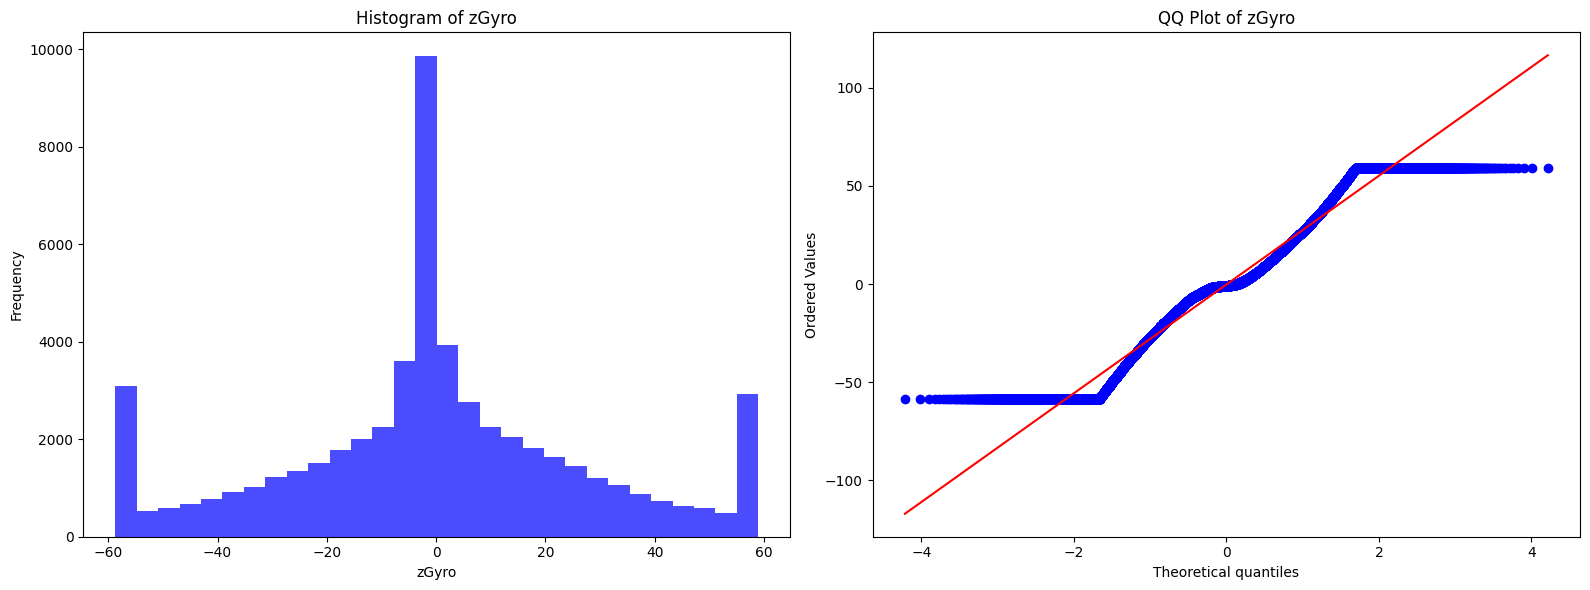

In [574]:
sns.boxplot(data = data, x = 'zGyro')
plt.show()

plot_data(data, 'zGyro')

In [575]:
data.shape

(55600, 5)

In [576]:
X = data.drop(['label'], axis = 1)
y = data['label']

In [577]:
y.value_counts()

label
light    27600
fall     18401
rfall     5599
lfall     4000
Name: count, dtype: int64

In [578]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [579]:
y_series = pd.Series(y)

In [580]:
print("Value counts of encoded labels:\n", y_series.value_counts())

Value counts of encoded labels:
 2    27600
0    18401
3     5599
1     4000
Name: count, dtype: int64


In [581]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
X_train.shape

(44480, 4)

In [582]:
X_train

,yAcc,zAcc,yGyro,zGyro
40936,-2.77,-3.71,-27.11,-20.08
45493,-6.31,-6.61,-1.71,-26.18
46072,1.04,-5.78,12.70,-17.82
43571,3.36,-5.48,-0.12,25.15
49203,-2.83,-9.31,2.08,-22.83
...,...,...,...,...
45891,-0.07,-5.43,-5.74,-6.23
52416,-0.92,-6.64,-2.32,58.96
42613,-2.15,7.02,0.43,-0.92
43567,1.30,-6.93,-0.55,58.96


In [583]:
y_train

array([0, 2, 0, ..., 0, 2, 3])

In [584]:
y_test

array([1, 2, 2, ..., 2, 0, 1])

In [585]:
y_train.shape

(44480,)

In [586]:
sampling_strategy = {
    0: 22000,
    1: 22000,
    2: 22000,
    3: 22000
}

In [587]:
from collections import Counter
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(sampling_strategy = sampling_strategy)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)
print("The number of classes before fit (): {}".format(Counter(y_train)))
print("The number of classes after fit (): {}".format(Counter(y_train_resampled)))

The number of classes before fit (): Counter({np.int64(2): 22000, np.int64(0): 14818, np.int64(3): 4475, np.int64(1): 3187})
The number of classes after fit (): Counter({np.int64(1): 21253, np.int64(3): 21161, np.int64(0): 19725, np.int64(2): 19255})


In [588]:
X_train_resampled.shape

(81394, 4)

In [589]:
X_train_resampled

,yAcc,zAcc,yGyro,zGyro
0,-2.770000,-3.710000,-27.110000,-20.080000
1,-6.310000,-6.610000,-1.710000,-26.180000
2,3.360000,-5.480000,-0.120000,25.150000
3,1.890000,7.140000,-17.270000,13.240000
4,-1.280000,5.890000,0.310000,-1.160000
...,...,...,...,...
81389,2.782911,7.099368,0.294552,12.264555
81390,-1.469896,8.080417,1.039009,-0.980000
81391,0.175725,8.055989,-13.009456,-31.785049
81392,-3.695758,7.364394,2.482424,5.635606


In [590]:
y_train_resampled.shape

(81394,)

In [594]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X_train_resampled, y_train_resampled)
y_pred_lor = lor.predict(X_test)


In [596]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score

In [ ]:
print('Accuracy is: ',accuracy_score(y_test, y_pred_lor))
print('precision_score is: ',precision_score(y_test, y_pred_lor,average='macro'))
print('Recall is: ',recall_score(y_test, y_pred_lor,average='macro'))
print('F1_score: ',f1_score(y_test, y_pred_lor, average='macro'))

Accuracy is:  0.46672661870503596
precision_score is:  0.3431061690095719
Recall is:  0.4646510729996688
F1_score:  0.338617278651132


In [606]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_resampled, y_train_resampled)
y_pred_rfc = rfc.predict(X_test)


print('Accuracy is: ',accuracy_score(y_test, y_pred_rfc))
print('precision_score is: ',precision_score(y_test, y_pred_rfc,average='macro'))
print('Recall is: ',recall_score(y_test, y_pred_rfc,average='macro'))
print('F1_score: ',f1_score(y_test, y_pred_rfc, average='macro'))

Accuracy is:  0.6240107913669065
precision_score is:  0.5485167776696838
Recall is:  0.5877456491200614
F1_score:  0.5601238442353865


In [607]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [1,3,4,5,7,9]
min_samples_leaf = [1, 2, 4, 6, 8]

random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'criterion' : ['entropy', 'gini']}

In [608]:
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator = rf,
                                param_distributions= random_grid,
                                n_iter = 100,
                                cv = 3,
                                verbose = 2,
                                random_state = 100,
                                n_jobs = -1)

In [1]:
# rf_randomcv.fit(X_train_resampled, y_train_resampled)